<a href="https://colab.research.google.com/github/tedwards523/ReadME.md/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Kirb21
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

df = pd.read_csv('https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv')
df.head(5)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [22]:
#Calculate subject
# type I, level I telencephalon (left)
telencephalon_L_volume = df[(df['type'] == 1) & (df['level'] == 1) & (df['roi'] == 'Telencephalon_L')]['volume'].iloc[0]

# type I, level I telencephalon (right)
telencephalon_R_volume = df[(df['type'] == 1) & (df['level'] == 1) & (df['roi'] == 'Telencephalon_R')]['volume'].iloc[0]

subject_data = df[(df['type'] == 1) & (df['level'] == 1)].iloc[0]
icv = subject_data['icv']
tbv = subject_data['tbv']

# Left Telencephalon
icv_fraction_L = telencephalon_L_volume / icv
tbv_fraction_L = telencephalon_L_volume / tbv

# Right Telencephalon
icv_fraction_R = telencephalon_R_volume / icv
tbv_fraction_R = telencephalon_R_volume / tbv

# Print the results
print(f"Telencephalon_L_volume: {telencephalon_L_volume}")
print(f"Telencephalon_R_volume: {telencephalon_R_volume}")
print(f"ICV_fraction_L: {icv_fraction_L:.6f}")
print(f"TBV_fraction_L: {tbv_fraction_L:.6f}")
print(f"ICV_fraction_R: {icv_fraction_R:.6f}")
print(f"TBV_fraction_R: {tbv_fraction_R:.6f}")

Telencephalon_L_volume: 531111
Telencephalon_R_volume: 543404
ICV_fraction_L: 0.385339
TBV_fraction_L: 0.418686
ICV_fraction_R: 0.394258
TBV_fraction_R: 0.428377


In [23]:
#all the regions
all_regions_df = df.groupby(['type', 'level'])['volume'].sum().reset_index()
all_regions_df = all_regions_df.rename(columns={'volume': 'total_volume'})
print(all_regions_df)

   type  level  total_volume
0     1      1      25622342
1     1      2      25622426
2     1      3      25622693
3     1      4      25623353
4     1      5      25624463
5     2      1      25622320
6     2      2      25622426
7     2      3      25622689
8     2      4      25622825
9     2      5      25623870


/tmp/ipython-input-110186656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='roi', y='volume', data=t1l2_data, palette='viridis')


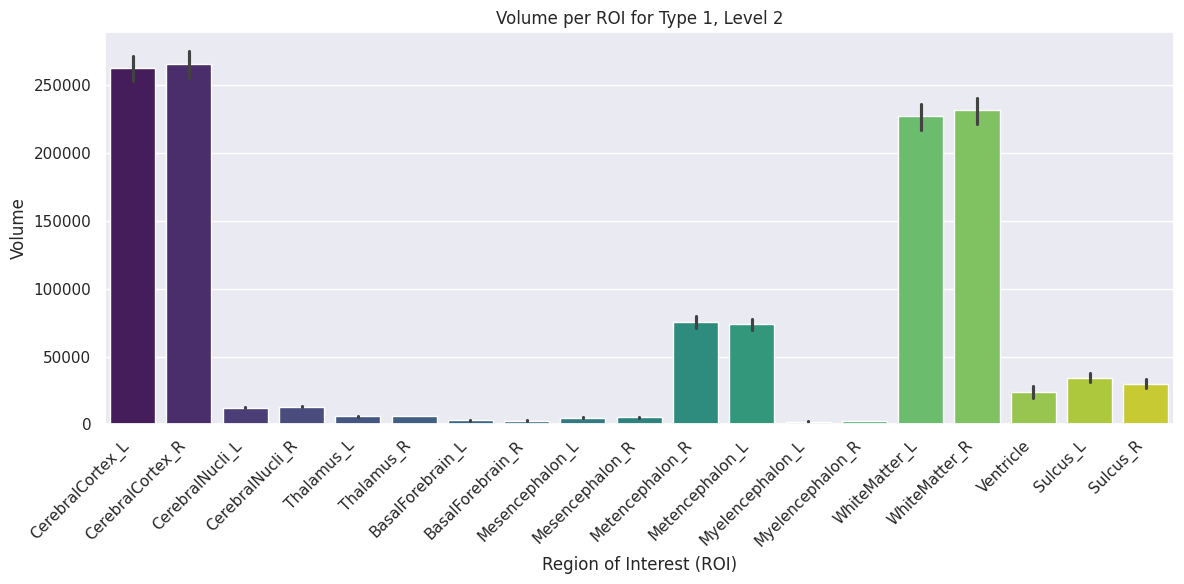

In [24]:
#Seaborn Bar Graph
t1l2_data = df[(df['type'] == 1) & (df['level'] == 2)]
plt.figure(figsize=(12, 6))
sns.barplot(x='roi', y='volume', data=t1l2_data, palette='viridis')
plt.title('Volume per ROI for Type 1, Level 2')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

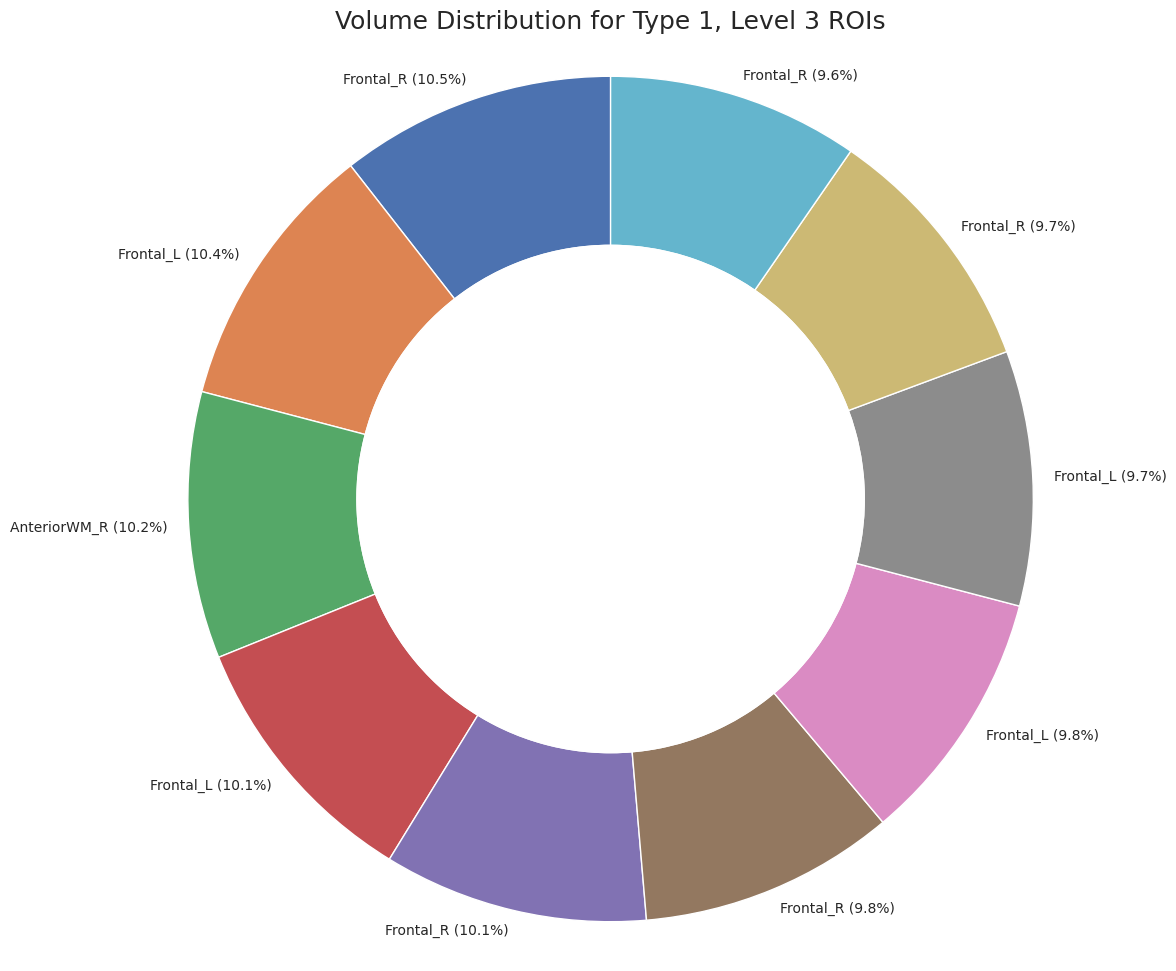

In [33]:
# Filter for Type 1, Level 3 data
type1_level3_data = df[(df['type'] == 1) & (df['level'] == 3)]

type1_level3_data = type1_level3_data.sort_values(by='volume', ascending=False)

type1_level3_data_top10 = type1_level3_data.head(10)

total_volume_t1l3_top10 = type1_level3_data_top10['volume'].sum()

percentages_top10 = (type1_level3_data_top10['volume'] / total_volume_t1l3_top10) * 100


labels_top10 = [f'{roi} ({p:.1f}%)' for roi, p in zip(type1_level3_data_top10['roi'], percentages_top10)]


fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(type1_level3_data_top10['volume'], labels=labels_top10, autopct='', startangle=90,
       wedgeprops=dict(width=0.4, edgecolor='white'),
       pctdistance=0.85, labeldistance=1.05, textprops={'fontsize': 10})


centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)


ax.axis('equal')
plt.title('Volume Distribution for Type 1, Level 3 ROIs', fontsize=18)
plt.show()

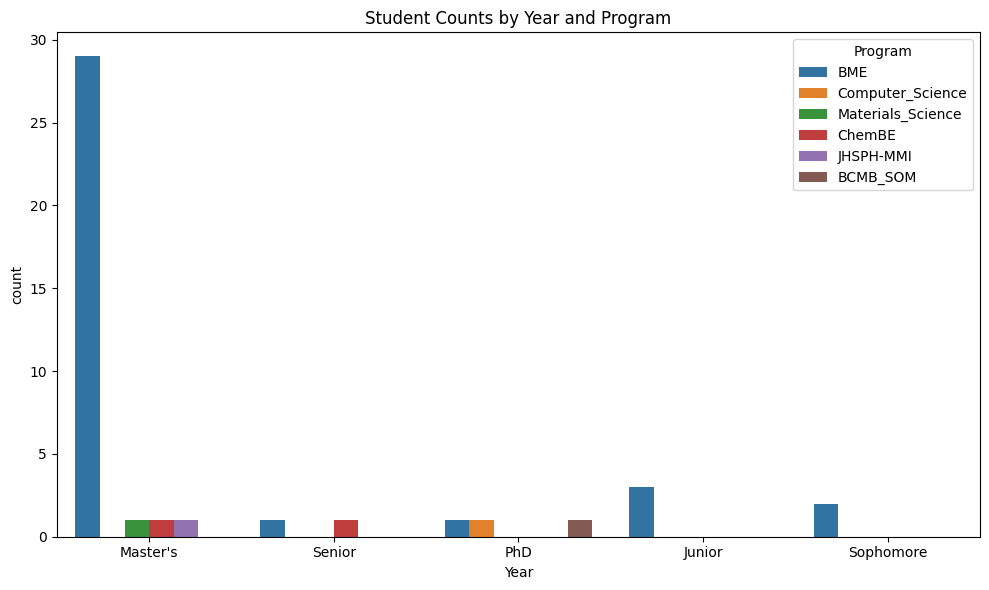

In [12]:
#class data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_interests_df = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme/master/data/classInterests.txt', sep='\t')

plt.figure(figsize=(10,6))
sns.countplot(data=class_interests_df, x="Year", hue="Program")
plt.title("Student Counts by Year and Program")
plt.tight_layout()
plt.show()

In [3]:
#Healthcare
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv'
healthcare_df = pd.read_csv(url, skiprows=2)

print("Healthcare spending data loaded successfully. Displaying the first 5 rows:")
print(healthcare_df.head())

Healthcare spending data loaded successfully. Displaying the first 5 rows:
        Location  1991__Total Health Spending  1992__Total Health Spending  \
0  United States                     675896.0                     731455.0   
1        Alabama                      10393.0                      11284.0   
2         Alaska                       1458.0                       1558.0   
3        Arizona                       9269.0                       9815.0   
4       Arkansas                       5632.0                       6022.0   

   1993__Total Health Spending  1994__Total Health Spending  \
0                     778684.0                     820172.0   
1                      12028.0                      12742.0   
2                       1661.0                       1728.0   
3                      10655.0                      11364.0   
4                       6397.0                       6810.0   

   1995__Total Health Spending  1996__Total Health Spending  \
0             

/tmp/ipython-input-1572134418.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


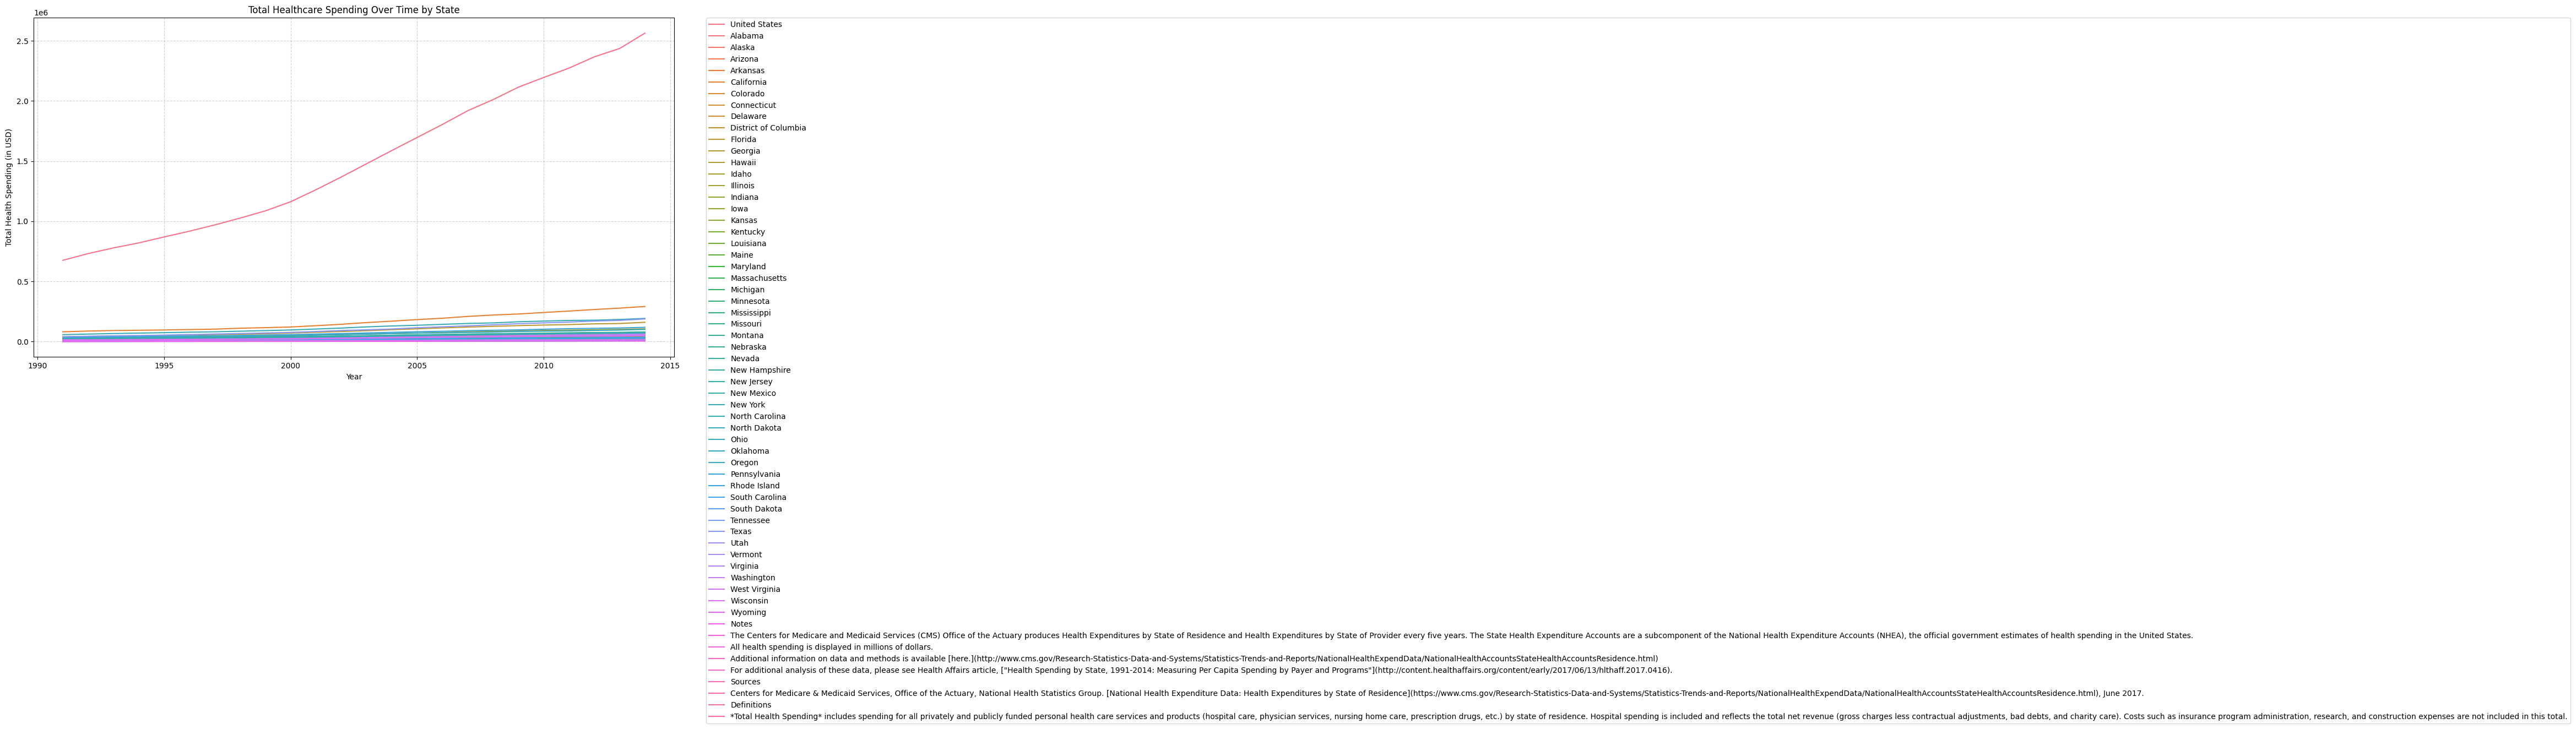

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(data=healthcare_long_df, x='Year', y='Total Health Spending', hue='Location', legend='full')
plt.title('Total Healthcare Spending Over Time by State')
plt.xlabel('Year')
plt.ylabel('Total Health Spending (in USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [17]:
year_columns = [col for col in healthcare_df.columns if 'Total Health Spending' in col]

healthcare_long_df = healthcare_df.melt(id_vars=['Location'],
                                        value_vars=year_columns,
                                        var_name='Year',
                                        value_name='Total Health Spending')

healthcare_long_df['Year'] = healthcare_long_df['Year'].apply(lambda x: int(x.split('__')[0]))

print("First 5 rows of healthcare_long_df:")
print(healthcare_long_df.head())

First 5 rows of healthcare_long_df:
        Location  Year  Total Health Spending
0  United States  1991               675896.0
1        Alabama  1991                10393.0
2         Alaska  1991                 1458.0
3        Arizona  1991                 9269.0
4       Arkansas  1991                 5632.0


/tmp/ipython-input-232922109.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


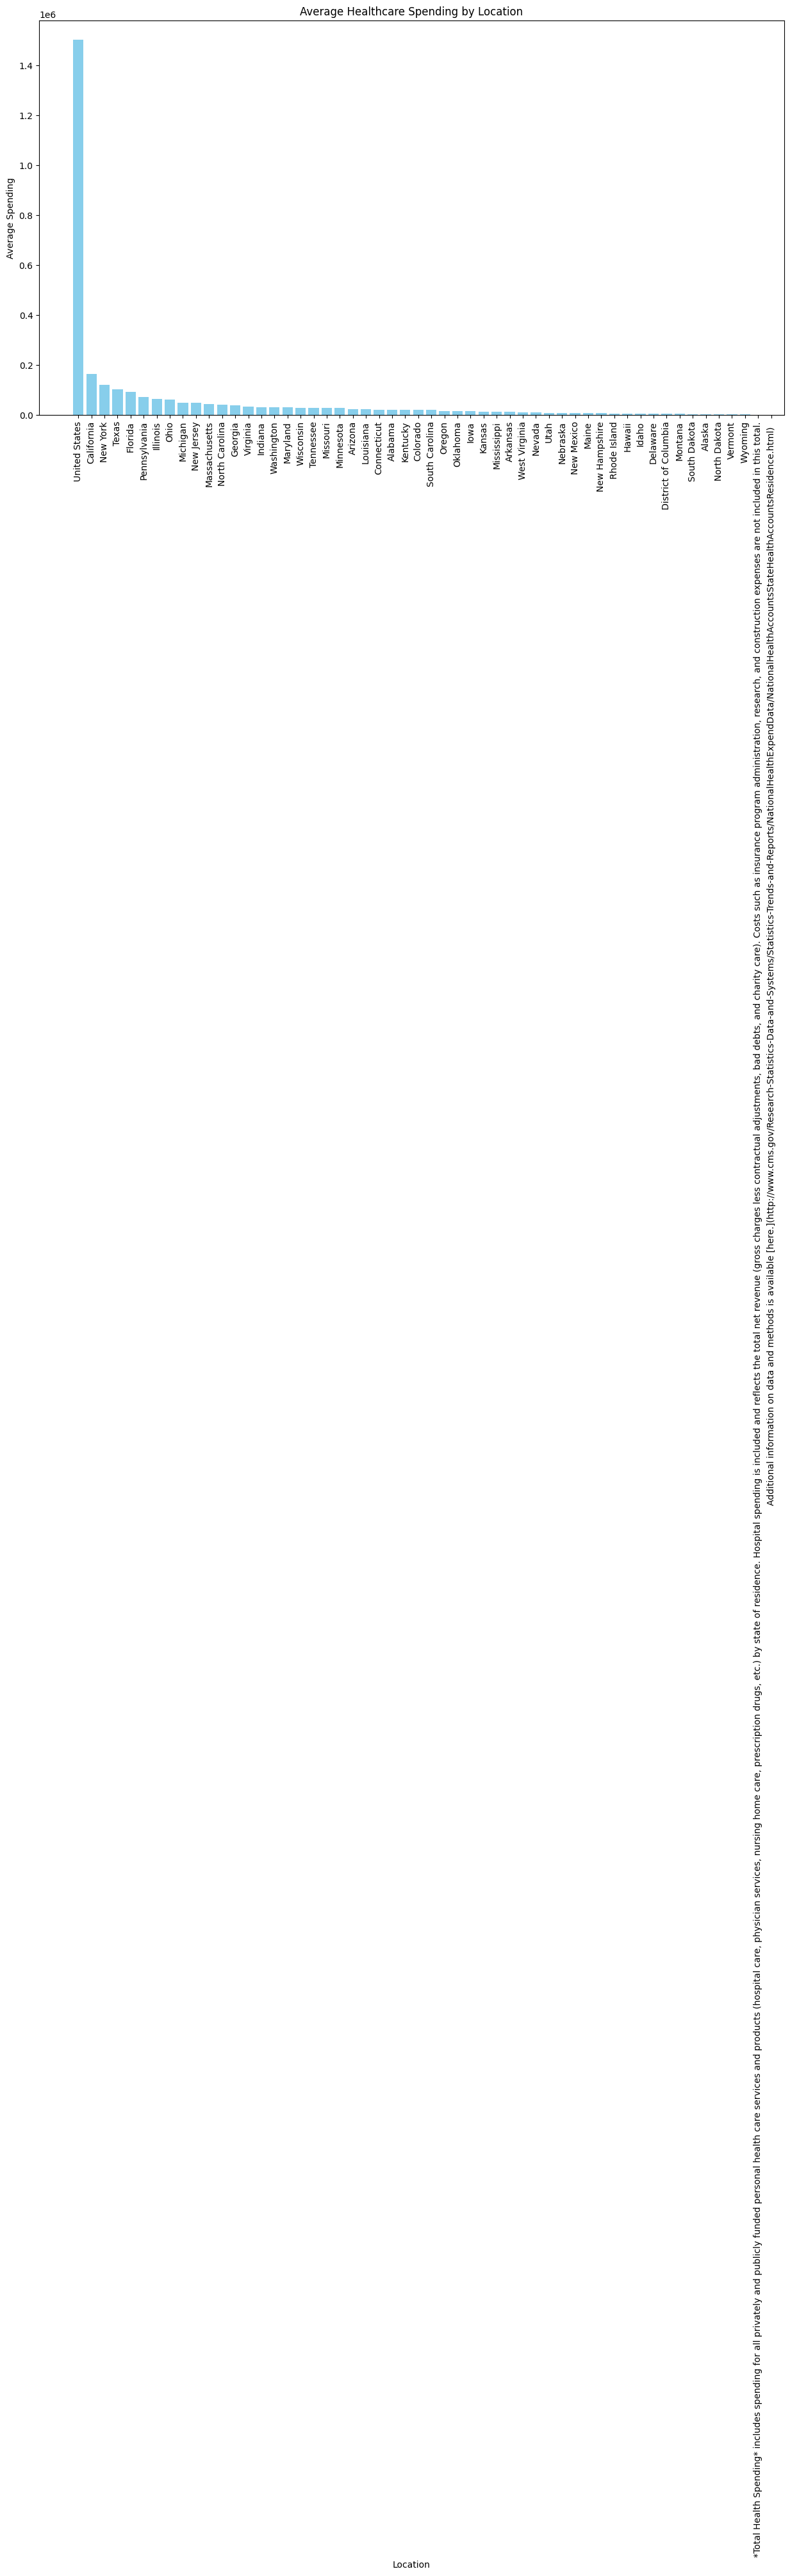

In [18]:
import matplotlib.pyplot as plt

# Calculate the average healthcare spending by Location
average_spending_by_location = healthcare_long_df.groupby('Location')['Total Health Spending'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
plt.bar(average_spending_by_location['Location'], average_spending_by_location['Total Health Spending'], color='skyblue')
plt.title('Average Healthcare Spending by Location')
plt.xlabel('Location')
plt.ylabel('Average Spending')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
gene_expression_df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv')
print(gene_expression_df.head())

  Unnamed: 0  GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  \
0  1007_s_at         6.333951         5.736190          6.156754   
1    1053_at         7.255622         7.399993          7.491967   
2     117_at         5.760106         4.825169          5.039387   
3     121_at         6.935451         7.025210          7.543667   
4  1255_g_at         3.597872         3.108801          3.128269   

   GSM136707.CEL.gz  GSM25553.CEL.gz  GSM136676.CEL.gz  GSM136711.CEL.gz  \
0          6.513010         6.061013          6.506493          6.863426   
1          7.006123         7.250995          7.082581          6.842236   
2          5.414160         5.205697          5.300078          5.099337   
3          7.959781         7.223323          8.006816          8.102504   
4          3.364947         3.125909          3.186834          3.311022   

   GSM136542.CEL.gz  GSM136535.CEL.gz  ...  GSM48650.CEL.gz  GSM25687.CEL.gz  \
0          6.369645          6.646321  ...         7.0

In [2]:
gene_expression_numeric = gene_expression_df.drop(columns=['Unnamed: 0'])
gene_expression_df_pt1 = gene_expression_numeric.sub(gene_expression_numeric.mean(axis=1), axis=0)
print("Gene_Expression_df_pt1:")
print(gene_expression_df_pt1.head())

DataFrame after subtracting row means:
   GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  GSM136707.CEL.gz  \
0        -0.049313        -0.647073         -0.226509          0.129747   
1         0.163992         0.308363          0.400337         -0.085507   
2         0.283074        -0.651863         -0.437645         -0.062873   
3        -0.648591        -0.558832         -0.040375          0.375740   
4         0.400185        -0.088886         -0.069418          0.167261   

   GSM25553.CEL.gz  GSM136676.CEL.gz  GSM136711.CEL.gz  GSM136542.CEL.gz  \
0        -0.322250          0.123230          0.480163         -0.013618   
1         0.159365         -0.009050         -0.249394         -0.043143   
2        -0.271335         -0.176954         -0.377696         -0.320573   
3        -0.360718          0.422774          0.518462         -0.149425   
4        -0.071777         -0.010852          0.113335         -0.105644   

   GSM136535.CEL.gz  GSM25399.CEL.gz  ...  GSM48650.C

In [6]:
gene_expression_df_pt2 = gene_expression_df_pt1.sub(gene_expression_df_pt1.mean(axis=0), axis=1)
print("Gene_Expression_df_pt2:")
print(gene_expression_df_pt2.head())

Gene_Expression_df_pt2:
   GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  GSM136707.CEL.gz  \
0        -0.024490        -0.640032         -0.223988          0.114936   
1         0.188815         0.315404          0.402858         -0.100318   
2         0.307897        -0.644822         -0.435124         -0.077684   
3        -0.623768        -0.551790         -0.037853          0.360928   
4         0.425008        -0.081844         -0.066896          0.152450   

   GSM25553.CEL.gz  GSM136676.CEL.gz  GSM136711.CEL.gz  GSM136542.CEL.gz  \
0        -0.428929          0.109485          0.457383         -0.017008   
1         0.052687         -0.022794         -0.272174         -0.046533   
2        -0.378014         -0.190699         -0.400475         -0.323963   
3        -0.467397          0.409030          0.495682         -0.152814   
4        -0.178456         -0.024597          0.090556         -0.109034   

   GSM136535.CEL.gz  GSM25399.CEL.gz  ...  GSM48650.CEL.gz  GSM25687

In [7]:
gene_expression_df_pt3 = gene_expression_df_pt2.div(gene_expression_df_pt2.std(axis=0), axis=1)
print("Gene_Expression_df_pt3:")
print(gene_expression_df_pt3.head())

Gene_Expression_df_pt3:
   GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  GSM136707.CEL.gz  \
0        -0.062810        -1.694428         -0.797346          0.362538   
1         0.484259         0.835005          1.434085         -0.316432   
2         0.789673        -1.707110         -1.548943         -0.245036   
3        -1.599798        -1.460817         -0.134750          1.138467   
4         1.090032        -0.216675         -0.238137          0.480868   

   GSM25553.CEL.gz  GSM136676.CEL.gz  GSM136711.CEL.gz  GSM136542.CEL.gz  \
0        -1.152413          0.366177          1.252187         -0.054154   
1         0.141554         -0.076237         -0.745136         -0.148166   
2        -1.015618         -0.637799         -1.096388         -1.031533   
3        -1.255766          1.368016          1.357039         -0.486577   
4        -0.479461         -0.082265          0.247916         -0.347177   

   GSM136535.CEL.gz  GSM25399.CEL.gz  ...  GSM48650.CEL.gz  GSM25687